## Pregunta: T3 - Entre la primera y la última versión de Ubuntu, ¿han habido cambios en los pesos de los paquetes? ¿Las distros pesan más? Comparación de todos los paquetes comparativa con todas las versiones

### 1. Importaciones

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

### 2. Lectura

In [8]:
df = pd.read_csv("../../datawarehouse/processed-ubuntu-packages.csv")

### 3. Preprocesado

In [9]:
# Filtrar los datos para quedarnos solo con los paquetes que están presentes en más de una versión
paquetes = df['Package'].value_counts()[df['Package'].value_counts() > 1].index
df = df[df['Package'].isin(paquetes)]

# Convertir la columna Size a tipo numérico
df['Size'] = pd.to_numeric(df['Size'])

# Crear una columna con el número de versión de Ubuntu
df['VersionNumber'] = df['Distro-Version'].apply(lambda x: int(x.split('.')[0].replace('-', '')))


### 4. Calcular diferencia tamaño

In [10]:
# Calcular la diferencia de tamaño entre la primera y la última versión de Ubuntu para cada paquete
diff_sizes = df.groupby('Package')['Size'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
diff_sizes.columns = ['Package', 'DiffSize']

# Realizar un test de hipótesis para determinar si hay evidencia suficiente para afirmar que las distros pesan más
t_stat, p_value = stats.ttest_1samp(diff_sizes['DiffSize'], 0)
if p_value < 0.05:
    print('Hay evidencia suficiente para afirmar que las distros pesan más.')
    print(f"El valor del estadístico de prueba t es {t_stat:.2f}, lo que indica que las diferencias en los tamaños de los paquetes son estadísticamente significativas.")
else:
    print('No hay evidencia suficiente para afirmar que las distros pesan más.')
    print(f"El p-value es {p_value:.2f}, lo que indica que no se puede rechazar la hipótesis nula de que no hay diferencias significativas en los tamaños de los paquetes entre la primera y la última versión de Ubuntu.")

Hay evidencia suficiente para afirmar que las distros pesan más.
El valor del estadístico de prueba t es 6.57, lo que indica que las diferencias en los tamaños de los paquetes son estadísticamente significativas.


### 5. Comparación de los paquetes

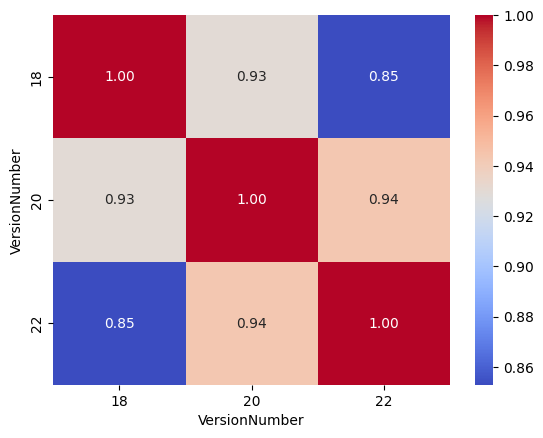

In [14]:
# Crear una matriz de correlación para comparar todos los paquetes con todas las versiones
matriz_corr = df.pivot_table(index='Package', columns='VersionNumber', values='Size', aggfunc=np.mean).corr()

# Visualizar la matriz de correlación mediante un mapa de calor
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()
